## IMPORTING PACKAGES

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime
from datetime import datetime as dt
import scipy
from scipy import stats
import os

## Available Data:

Data has been provided for the period of Sep 2016 to Oct 2018 and the below is the data model.

## Tables:

In [2]:
%cd "C:\Users\itsfe\Downloads\Python Foundation End to End Case Study E-Commerce Analytics Project"

C:\Users\itsfe\Downloads\Python Foundation End to End Case Study E-Commerce Analytics Project


In [3]:
cust=pd.read_csv('CUSTOMERS.csv')
seller=pd.read_csv('SELLERS.csv')
prod=pd.read_csv('PRODUCTS.csv')
order=pd.read_csv('ORDERS.csv',parse_dates=[3,4,5,6,7])
ord_item=pd.read_csv('ORDER_ITEMS.csv')
ord_pay=pd.read_csv('ORDER_PAYMENTS.csv')
ord_rev_rat=pd.read_csv('ORDER_REVIEW_RATINGS.csv',parse_dates=[3,4])
geo_loc=pd.read_csv('GEO_LOCATION.csv')

## DATA CLEANING

In [4]:
def miss_treat(x):
    if x.dtype=='float' or x.dtype=='int':
        x=x.fillna(x.median())
    else:
        x=x.fillna(x.mode()[0])
    return x

In [5]:
seller=seller.apply(miss_treat)
seller.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [6]:
prod=prod.apply(miss_treat)
prod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32951 non-null  object 
 2   product_name_lenght         32951 non-null  float64
 3   product_description_lenght  32951 non-null  float64
 4   product_photos_qty          32951 non-null  float64
 5   product_weight_g            32951 non-null  float64
 6   product_length_cm           32951 non-null  float64
 7   product_height_cm           32951 non-null  float64
 8   product_width_cm            32951 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [7]:
order=order.apply(miss_treat)
order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99441 non-null  datetime64[ns]
 5   order_delivered_carrier_date   99441 non-null  datetime64[ns]
 6   order_delivered_customer_date  99441 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [8]:
ord_item.order_item_id=ord_item.order_item_id.astype('object')
#order.order_id=order.order_id.drop_duplicates(keep='first',inplace=False)
ord_item=ord_item.apply(miss_treat)
ord_item.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [9]:
#ord_rev_rat.review_id=ord_rev_rat.review_id.drop_duplicates(keep='first',inplace=False)
ord_rev_rat=ord_rev_rat.apply(miss_treat)
ord_rev_rat.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   review_id                100000 non-null  object        
 1   order_id                 100000 non-null  object        
 2   review_score             100000 non-null  int64         
 3   review_creation_date     100000 non-null  datetime64[ns]
 4   review_answer_timestamp  100000 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(2)
memory usage: 3.8+ MB


In [10]:
geo_loc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19015 entries, 0 to 19014
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   geolocation_zip_code_prefix  19015 non-null  int64  
 1   geolocation_lat              19015 non-null  float64
 2   geolocation_lng              19015 non-null  float64
 3   geolocation_city             19015 non-null  object 
 4   geolocation_state            19015 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 742.9+ KB


## Business Objective:

## 1. Perform Detailed exploratory analysis
## a. Define & calculate high level metrics like (Total Revenue, Total quantity, Total products, Total categories, Total sellers, Total locations, Total channels, Total payment methods etc…)

In [11]:
## Merging tables
ord_cust=pd.merge(how='left',left=cust,right=order,on='customer_id')
cust_ord_orditem=pd.merge(how='inner',left=ord_cust,right=ord_item,on='order_id')
cust_ord_orditem_prod=pd.merge(how='left',left=cust_ord_orditem,right=prod,on='product_id')
cust_ord_geoloc=pd.merge(how='inner',left=ord_cust,right=geo_loc,left_on='customer_zip_code_prefix',right_on='geolocation_zip_code_prefix')
cust_ord_orditem_geoloc=pd.merge(how='inner',left=cust_ord_geoloc,right=ord_item,on='order_id')
cust_ord_ordpay=pd.merge(how='inner',left=ord_cust,right=ord_pay,on='order_id')
cust_ord_ordpay_orditem=pd.merge(how='inner',left=cust_ord_orditem,right=ord_pay,on='order_id')
cust_seller=pd.merge(how='inner',left=cust_ord_orditem_prod,right=seller,left_on='customer_zip_code_prefix',right_on='seller_zip_code_prefix')


In [12]:
## Customer details
total_customers=cust.customer_id.count()
ord_cust['month']=order.order_purchase_timestamp.dt.to_period('M')
ord_cust['Year']=order.order_purchase_timestamp.dt.to_period('Y')
ord_cust_by_year=ord_cust.groupby('Year')[['customer_id']].count()
ord_cust_by_month=ord_cust.groupby('month')[['customer_id']].count()

In [13]:
## Seller details
total_sellers=seller.seller_id.count()
seller_by_city=seller.groupby('seller_city')[['seller_id']].count()
seller_by_state=seller.groupby('seller_state')[['seller_id']].count()

In [14]:
##Payment details
total_payment_methods=len(pd.unique(ord_pay['payment_type']))
payment_methods=ord_pay.groupby('payment_type')[['order_id']].count()

In [15]:
## Product details
total_products=prod.product_id.count()
ord_item['Revenue']=ord_item['price']
total_revenue=ord_item['Revenue'].sum()
cust_ord_orditem=pd.merge(how='inner',left=ord_cust,right=ord_item,on='order_id')
cust_ord_orditem.head()
#items_per_product=ord_item.groupby('product_id')[['order_item_id']].count()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,order_estimated_delivery_date,month,Year,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,Revenue
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Adilabad,Andhra Pradesh,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:00,2017-05-16 15:22:00,2017-05-23 10:47:00,...,2017-06-05,2017-10,2017,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,5/22/2017 15:22,124.99,21.88,124.99
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,Adoni,Andhra Pradesh,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:00,2018-01-12 20:58:00,2018-01-15 17:14:00,...,2018-02-06,2018-07,2018,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,1/18/2018 20:58,289.00,46.48,289.00
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,Akkarampalle,Andhra Pradesh,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:00,2018-05-20 16:19:00,2018-06-11 14:31:00,...,2018-06-13,2018-08,2018,1,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,6/5/2018 16:19,139.94,17.79,139.94
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,Akkayapalle,Andhra Pradesh,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:00,2018-03-13 17:29:00,2018-03-27 23:22:00,...,2018-04-10,2017-11,2017,1,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,3/27/2018 16:31,149.94,23.36,149.94
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,Alwal,Andhra Pradesh,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:00,2018-07-29 10:10:00,2018-07-30 15:16:00,...,2018-08-15,2018-02,2018,1,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,7/31/2018 10:10,230.00,22.25,230.00


In [16]:
## Product category details
total_categories=len(pd.unique(prod['product_category_name']))
cust_ord_orditem_prod=pd.merge(how='left',left=cust_ord_orditem,right=prod,on='product_id')
qty_by_category=pd.pivot_table(data=cust_ord_orditem_prod,values='product_id',index='product_category_name',aggfunc='count')
rev_by_category=pd.pivot_table(data=cust_ord_orditem_prod,values='Revenue',index='product_category_name',aggfunc='sum')


In [17]:
## Geoographic metrices
total_cities=len(pd.unique(geo_loc.geolocation_city))
location_by_state=pd.pivot_table(data=geo_loc,values='geolocation_zip_code_prefix',index='geolocation_state',aggfunc='count')
cust_by_city=pd.pivot_table(data=cust,index='customer_city',values='customer_id',aggfunc='count')
cust_by_state=pd.pivot_table(data=cust,index='customer_state',values='customer_id',aggfunc='count')
qty_by_loc=pd.pivot_table(data=cust_ord_geoloc,values='order_id',index='geolocation_state',aggfunc='count')

## b. Understanding how many new customers acquired every month

In [18]:
cust_per_month=ord_cust.groupby(['month',ord_cust.customer_unique_id.rename('customer')])[['customer_unique_id']].count().reset_index()
first_purchase=ord_cust.groupby('customer_unique_id')[['month']].min()
final=pd.merge(how='inner',left=cust_per_month,right=first_purchase,left_on='customer',right_on='customer_unique_id')
new=final[final.month_x==final.month_y]
new.groupby('month_x')[['customer_unique_id']].count()
cust_per_month
first_purchase
new

,month_x,customer,customer_unique_id,month_y
0,2016-09,208c243a9fe50639cbef36748254ca72,1,2016-09
1,2016-09,ac162ff796817cd3b69106c684a0e447,1,2016-09
2,2016-09,be114997aa2e6f93827c7ee261e550c8,1,2016-09
3,2016-09,d38db8e13c1f15ddbf9fd302a4eaafaa,1,2016-09
4,2016-10,001a2bf0e46c684031af91fb2bce149d,1,2016-10
...,...,...,...,...
99212,2018-09,d503a54b097839c00b51c1000c863873,1,2018-09
99213,2018-09,f60fe3cb5de099b3055c4cefada6c1c7,1,2018-09
99214,2018-10,202a17812bf14c4879aa314899918c86,1,2018-10
99215,2018-10,832d9b1424ba5a4e691bdb0bea10ccf8,1,2018-10


## c. Understand the retention of customers on month on month basis

In [19]:
old= final[final.month_x!=final.month_y]   
old.groupby('month_x')[['customer_unique_id']].count()

,customer_unique_id
month_x,
2017-03,4
2017-04,14
2017-05,21
2017-06,28
2017-07,44
2017-08,60
2017-09,70
2017-10,90
2017-11,165


## d. How the revenues from existing/new customers on month on month basis

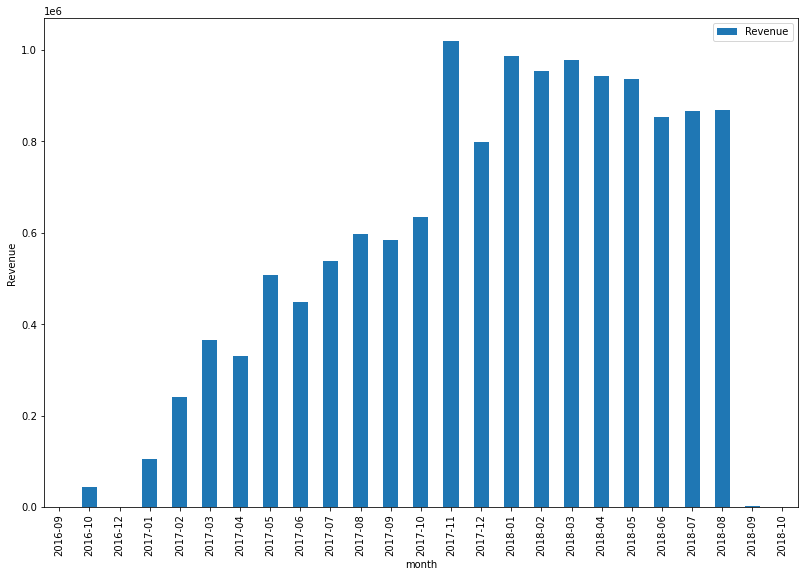

In [20]:
cust['month']=order.order_purchase_timestamp.dt.to_period('M')
pd.pivot_table(data=cust_ord_orditem,values='Revenue',index='month',aggfunc='sum').plot(kind='bar',figsize=(13.5,9),ylabel='Revenue')
plt.show()


## 

## e. Understand the trends/seasonality of sales, quantity by category, location, month,week, day, time, channel, payment method etc…

In [21]:
##sales_by_category
pd.pivot_table(data=cust_ord_orditem_prod,values='Revenue',index='product_category_name',aggfunc='sum')

,Revenue
product_category_name,
Agro_Industry_And_Commerce,72530.47
Air_Conditioning,55024.96
Art,24202.64
Arts_And_Craftmanship,1814.01
Audio,50688.50
...,...
Stationery,230943.23
Tablets_Printing_Image,7528.41
Telephony,323667.53


In [22]:
##qty_by_category
pd.pivot_table(data=cust_ord_orditem_prod,index='product_category_name',values='order_id',aggfunc='count')

,order_id
product_category_name,
Agro_Industry_And_Commerce,212
Air_Conditioning,297
Art,209
Arts_And_Craftmanship,24
Audio,364
...,...
Stationery,2517
Tablets_Printing_Image,83
Telephony,4545


In [23]:
##sales_by_month
pd.pivot_table(data=cust_ord_orditem,values='Revenue',index='month',aggfunc='sum')

,Revenue
month,
2016-09,281.59
2016-10,43289.87
2016-12,109.90
2017-01,104755.45
2017-02,239569.20
2017-03,365202.73
2017-04,329290.30
2017-05,506776.40
2017-06,449215.35


In [24]:
##qty_by_month
pd.pivot_table(data=cust_ord_orditem,values='order_id',index='month',aggfunc='count')

,order_id
month,
2016-09,5
2016-10,398
2016-12,1
2017-01,926
2017-02,2029
2017-03,3030
2017-04,2716
2017-05,4190
2017-06,3681


In [25]:
## qty_by_days
cust['day']=order.order_purchase_timestamp.dt.to_period('D')
ord_cust=pd.merge(how='left',left=cust,right=order,on='customer_id')
pd.pivot_table(data=ord_cust,index='day',values='order_id',aggfunc='count')

,order_id
day,
2016-09-04,1
2016-09-05,1
2016-09-13,1
2016-09-15,1
2016-10-02,1
...,...
2018-09-29,1
2018-10-01,1
2018-10-03,1


In [26]:
## sales_by_days
cust['day']=order.order_purchase_timestamp.dt.to_period('D')
cust_ord_orditem=pd.merge(how='inner',left=ord_cust,right=ord_item,on='order_id')
pd.pivot_table(data=cust_ord_orditem,index='day',values='Revenue',aggfunc='sum')

,Revenue
day,
2016-09-04,19.99
2016-09-05,123.80
2016-09-13,47.90
2016-09-15,89.90
2016-10-02,23.50
...,...
2018-09-29,115.20
2018-10-01,39.99
2018-10-03,157.77


In [27]:
##qty_by_city
pd.pivot_table(data=cust_ord_geoloc,index='customer_city',values='order_id',aggfunc='count')

,order_id
customer_city,
Aadityana,18
Aambaliyasan,2
Aantaliya,93
Aarambhada,44
Abiramam,1
...,...
Zamin Uthukuli,2
Ziauddin Pur,139
Zira,4


In [28]:
##sales_by_geoloc
cust_ord_orditem_geoloc=pd.merge(how='inner',left=cust_ord_geoloc,right=ord_item,on='order_id')
pd.pivot_table(data=cust_ord_orditem_geoloc,index='customer_city',values='Revenue',aggfunc='sum')

,Revenue
customer_city,
Aadityana,1608.73
Aambaliyasan,169.80
Aantaliya,13149.78
Aarambhada,5106.24
Abiramam,74.90
...,...
Zamin Uthukuli,107.99
Ziauddin Pur,17574.58
Zira,434.65


In [29]:
##qty_by_payment_type
pd.pivot_table(data=cust_ord_ordpay,index='payment_type',values='order_id',aggfunc='count')

,order_id
payment_type,
UPI,19784
credit_card,76795
debit_card,1529
not_defined,3
voucher,5775


In [30]:
##sales_by_payment
cust_ord_ordpay_orditem=pd.merge(how='inner',left=cust_ord_orditem,right=ord_pay,on='order_id')
pd.pivot_table(data=cust_ord_ordpay_orditem,index='payment_type',values='Revenue',aggfunc='sum')

,Revenue
payment_type,
UPI,2391525.66
credit_card,10974357.30
debit_card,183758.74
voucher,659473.64


## f. Popular Products by month, seller, state, category.

In [31]:

cust_ord_orditem_prod.groupby(['month',cust_ord_orditem_prod.product_id.rename('product')]).product_id.count().reset_index().sort_values(by=['month','product_id'],ascending=[True,False])

,month,product,product_id
3,2016-09,e5ae72c62ebfa708624f5029d609b160,2
0,2016-09,154e7e31ebfa092203795c972e5804a6,1
1,2016-09,57e089e3103f5cda6a4ce23b77399bdb,1
2,2016-09,a3126b78e50cb94ff1a2826837bc6877,1
215,2016-10,a62e25e09e05e6faf31d90c6ec1aa3d1,13
...,...,...,...
74944,2018-09,fb29f48bfea41db52e349454f433340e,1
74945,2018-10,06edb72f1e0c64b14c5b79353f7abea3,1
74946,2018-10,1613b819ab5dae53aead2dbb4ebdb378,1
74947,2018-10,36f60d45225e60c7da4558b070ce4b60,1


In [32]:

cust_ord_orditem_prod.groupby(['seller_id',cust_ord_orditem_prod.product_id.rename('product')]).product_id.count().reset_index().sort_values(by=['seller_id','product_id'],ascending=[True,False])

,seller_id,product,product_id
0,0015a82c2db000af6aaaf3ae2ecb0532,a2ff5a97bf95719e38ea2e3b4105bce8,3
1,001cca7ae9ae17fb1caed9dfb1094831,08574b074924071f4e201e151b152b4e,113
11,001cca7ae9ae17fb1caed9dfb1094831,e251ebd2858be1aa7d9b2087a6992580,48
9,001cca7ae9ae17fb1caed9dfb1094831,98a8c2fa16d7239c606640f5555768e4,30
2,001cca7ae9ae17fb1caed9dfb1094831,0da9ffd92214425d880de3f94e74ce39,17
...,...,...,...
34442,ffff564a4f9085cd26170f4732393726,c7d75b3bafed2b1d9475c4876b1c46b8,1
34443,ffff564a4f9085cd26170f4732393726,cb17b798ba889575385281b7ec2fc22b,1
34445,ffff564a4f9085cd26170f4732393726,de6517dda8e49774f58c07f80abc8d7a,1
34446,ffff564a4f9085cd26170f4732393726,e20b58fe57d487f33247e6cc1154eb9c,1


In [33]:
cust_ord_orditem_prod.groupby(['customer_state',cust_ord_orditem_prod.product_id.rename('product')]).product_id.count().reset_index().sort_values(by=['customer_state','product_id'],ascending=[True,False])

,customer_state,product,product_id
16353,Andhra Pradesh,aca2eb7d00ea1a7b8ebd4e68314663af,345
14598,Andhra Pradesh,99a4788cb24856965c36a24e339b6058,294
6379,Andhra Pradesh,422879e10f46682990de24d770e7f83d,283
8042,Andhra Pradesh,53b36df67ebb7c41585e8d54d6772e08,225
5444,Andhra Pradesh,389d119b48cf3043d311335e499d9c6b,224
...,...,...,...
55199,West Bengal,fa00124915804f23967ae06d7dfd5874,1
55200,West Bengal,fbce4c4cb307679d89a3bf3d3bb353b9,1
55201,West Bengal,fe05ad488982d6de6373f13486d92d99,1
55202,West Bengal,fe6a9515d655fa7936b8a7c841039f34,1


In [34]:
cust_ord_orditem_prod.groupby(['product_category_name',cust_ord_orditem_prod.product_id.rename('product')]).product_id.count().reset_index().sort_values(by=['product_category_name','product_id'],ascending=[True,False])

,product_category_name,product,product_id
7,Agro_Industry_And_Commerce,11250b0d4b709fee92441c5f34122aed,22
24,Agro_Industry_And_Commerce,423a6644f0aa529e8828ff1f91003690,18
35,Agro_Industry_And_Commerce,672e757f331900b9deea127a2a7b79fd,17
22,Agro_Industry_And_Commerce,3bebad3cf2c8d1a8d3ce97174643e054,14
40,Agro_Industry_And_Commerce,a0fe1efb855f3e786f0650268cd77f44,13
...,...,...,...
32943,Watches_Gifts,feeed1b9f26cce6eb3cb81af65eddd9e,1
32944,Watches_Gifts,fef80a5fb121b63bedd4096ff28f6aaa,1
32947,Watches_Gifts,ff7b4560eaf93a8848cd5fde641f39c6,1
32948,Watches_Gifts,ff80f0538290775336ee74b4997a855c,1


## g. Popular categories by state, month

In [35]:
cust_ord_orditem_prod.groupby(['customer_state',cust_ord_orditem_prod.product_category_name.rename('category')]).product_category_name.count().reset_index().sort_values(by=['customer_state','product_category_name'],ascending=[True,False])

,customer_state,category,product_category_name
7,Andhra Pradesh,Bed_Bath_Table,8172
43,Andhra Pradesh,Health_Beauty,6023
65,Andhra Pradesh,Sports_Leisure,5327
39,Andhra Pradesh,Furniture_Decor,5239
15,Andhra Pradesh,Computers_Accessories,4859
...,...,...,...
1045,West Bengal,Construction_Tools_Safety,1
1047,West Bengal,Costruction_Tools_Garden,1
1050,West Bengal,Fashion_Male_Clothing,1
1059,West Bengal,Home_Confort,1


In [36]:
cust_ord_orditem_prod.groupby(['month',cust_ord_orditem_prod.product_category_name.rename('category')]).product_category_name.count().reset_index().sort_values(by=['month','product_category_name'],ascending=[True,False])

,month,category,product_category_name
1,2016-09,Computers_Accessories,2
0,2016-09,Baby,1
2,2016-09,Furniture_Decor,1
3,2016-09,Health_Beauty,1
8,2016-10,Bed_Bath_Table,39
...,...,...,...
1349,2018-09,Telephony,1
1351,2018-09,Watches_Gifts,1
1353,2018-10,Bed_Bath_Table,2
1352,2018-10,Auto,1


## h. List top 10 most expensive products sorted by price

In [37]:
cust_ord_orditem_prod[['product_id','price']].sort_values(by='price',ascending=False)

,product_id,price
15307,489ae2aa008f021502940f251d4cce7f,6735.00
24051,69c590f7ffc7bf8db97190b6cb6ed62e,6729.00
4429,1bdf5e6731585cf01aa8169c7028d6ad,6499.00
30924,a6492cc69376c469ab6f61d8f44de961,4799.00
13683,c3ed642d592594bb648ff4a04cee2747,4690.00
...,...,...
53410,270516a3f41dc035aa87d220228f844c,1.20
53411,270516a3f41dc035aa87d220228f844c,1.20
3578,8a3254bee785a526d548a81a9bc3c9be,0.85
31456,8a3254bee785a526d548a81a9bc3c9be,0.85


## 2. Performing Customers/sellers Segmentation

## a. Divide the customers into groups based on the revenue generated

In [38]:

cust_ord_orditem_prod.Revenue.max()

6735.0

In [39]:
cust_order=pd.merge(how='left',left=cust,right=order,on='customer_id')
cust_ord_item=pd.merge(how='left',left=cust_order,right=ord_item,on='order_id')
new=cust_ord_item[['customer_id','Revenue']]
new['groups']=np.where(new.Revenue>4000,'High',(np.where(new.Revenue>1000,'Medium',(np.where(new.Revenue>900,'Low',('Very Low'))))))
new.head()

C:\Users\itsfe\AppData\Local\Temp\ipykernel_17124\3832442268.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new['groups']=np.where(new.Revenue>4000,'High',(np.where(new.Revenue>1000,'Medium',(np.where(new.Revenue>900,'Low',('Very Low'))))))


,customer_id,Revenue,groups
0,06b8999e2fba1a1fbc88172c00ba8bc7,124.99,Very Low
1,18955e83d337fd6b2def6b18a428ac77,289.00,Very Low
2,4e7b3e00288586ebd08712fdd0374a03,139.94,Very Low
3,b2b6027bc5c5109e529d4dc6358b12c3,149.94,Very Low
4,4f2d8ab171c80ec8364f7c12e35b23ad,230.00,Very Low


## b. Divide the sellers into groups based on the revenue generated

In [40]:
seller_orditem=pd.merge(how='left',left=seller,right=ord_item,on='seller_id')
new1=cust_ord_item[['seller_id','Revenue']]
new1['groups']=np.where(new.Revenue>4000,'High',(np.where(new.Revenue>1000,'Medium',(np.where(new.Revenue>900,'Low',('Very Low'))))))
new1.head()

C:\Users\itsfe\AppData\Local\Temp\ipykernel_17124\9124167.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new1['groups']=np.where(new.Revenue>4000,'High',(np.where(new.Revenue>1000,'Medium',(np.where(new.Revenue>900,'Low',('Very Low'))))))


,seller_id,Revenue,groups
0,7c67e1448b00f6e969d365cea6b010ab,124.99,Very Low
1,b8bc237ba3788b23da09c0f1f3a3288c,289.00,Very Low
2,7c67e1448b00f6e969d365cea6b010ab,139.94,Very Low
3,7c67e1448b00f6e969d365cea6b010ab,149.94,Very Low
4,4a3ca9315b744ce9f8e9374361493884,230.00,Very Low


## 3. Cross-Selling (Which products are selling together)

In [61]:
dup=ord_item[ord_item.order_id.duplicated(keep=False)]
dup1=dup[['order_id','product_id']]
dup1['grouped_products']=dup1.groupby(by='order_id')[['product_id']].transform(lambda x:','.join(x))
dup1[['order_id','grouped_products']]
dup1.groupby('grouped_products')[['order_id']].count().sort_values(by='order_id',ascending=False).head(10)

C:\Users\itsfe\AppData\Local\Temp\ipykernel_17124\237540290.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dup1['grouped_products']=dup1.groupby(by='order_id')[['product_id']].transform(lambda x:','.join(x))


,order_id
grouped_products,
"aca2eb7d00ea1a7b8ebd4e68314663af,aca2eb7d00ea1a7b8ebd4e68314663af",144
"422879e10f46682990de24d770e7f83d,422879e10f46682990de24d770e7f83d",102
"53759a2ecddad2bb87a079a1f1519f73,53759a2ecddad2bb87a079a1f1519f73",100
"389d119b48cf3043d311335e499d9c6b,389d119b48cf3043d311335e499d9c6b",88
"368c6c730842d78016ad823897a372db,368c6c730842d78016ad823897a372db",86
"b532349fe46b38fbc7bb3914c1bdae07,b532349fe46b38fbc7bb3914c1bdae07,b532349fe46b38fbc7bb3914c1bdae07",78
"b532349fe46b38fbc7bb3914c1bdae07,b532349fe46b38fbc7bb3914c1bdae07",50
"42a2c92a0979a949ca4ea89ec5c7b934,42a2c92a0979a949ca4ea89ec5c7b934",42
"656e0eca68dcecf6a31b8ececfabe3e8,656e0eca68dcecf6a31b8ececfabe3e8",40


## Payment Behaviour
## a. How customers are paying?

In [42]:
cust_pay=pd.merge(how='inner',left=cust_order,right=ord_pay,on='order_id')
cust_pay.payment_type.unique()

array(['credit_card', 'debit_card', 'voucher', 'UPI', 'not_defined'],
      dtype=object)

## b. Which payment channels are used by most customers?

In [43]:
pd.pivot_table(data=cust_pay,index='payment_type',values='customer_id',aggfunc='count').sort_values(by='customer_id',ascending=False)

,customer_id
payment_type,
credit_card,76795
UPI,19784
voucher,5775
debit_card,1529
not_defined,3


## 5. Customer satisfaction towards category & product
## a. Which categories (top 10) are maximum rated & minimum rated?

In [44]:
prod_orditem=pd.merge(how='left',left=prod,right=ord_item,on='product_id')
prod_orditem_rat=pd.merge(how='left',left=prod_orditem,right=ord_rev_rat,on='order_id')
max_rated=pd.pivot_table(data=prod_orditem_rat,values='review_score',index='product_category_name',aggfunc='mean').sort_values(by='review_score',ascending=False).head(10)
min_rated=pd.pivot_table(data=prod_orditem_rat,values='review_score',index='product_category_name',aggfunc='mean').sort_values(by='review_score',ascending=False).tail(10)


## b. Which products (top10) are maximum rated & minimum rated?

In [45]:
max_prod=pd.pivot_table(data=prod_orditem_rat,values='review_score',index='product_id',aggfunc='mean').sort_values(by='review_score',ascending=False).head(10)
min_prod=pd.pivot_table(data=prod_orditem_rat,values='review_score',index='product_id',aggfunc='mean').sort_values(by='review_score',ascending=False).tail(10)

## c. Average rating by location, seller, product, category, month etc.

In [46]:
cust_loc=pd.merge(how='left',left=geo_loc,right=cust,left_on='geolocation_zip_code_prefix',right_on='customer_zip_code_prefix')
cust_loc_order=pd.merge(how='left',left=cust_loc,right=order,left_on='customer_id',right_on='customer_id')
final=pd.merge(how='left',left=cust_loc_order,right=ord_rev_rat,left_on='order_id',right_on='order_id')

avg_by_loc=pd.pivot_table(data=final,values='review_score',index='geolocation_state',aggfunc='mean')
avg_by_loc

,review_score
geolocation_state,
Andhra Pradesh,4.052318
Arunachal Pradesh,4.103175
Chhattisgarh,4.090699
Delhi,4.055074
Goa,4.777778
Gujarat,4.092922
Haryana,4.156295
Himachal Pradesh,4.002853
Jammu & Kashmir,4.097004


In [47]:
seller_orditem_rat=pd.merge(how='left',left=seller_orditem,right=ord_rev_rat,on='order_id')
pd.pivot_table(data=seller_orditem_rat,values='review_score',index='seller_id',aggfunc='mean')

,review_score
seller_id,
0015a82c2db000af6aaaf3ae2ecb0532,3.666667
001cca7ae9ae17fb1caed9dfb1094831,3.874477
001e6ad469a905060d959994f1b41e4f,1.000000
002100f778ceb8431b7a1020ff7ab48f,3.982143
003554e2dce176b5555353e4f3555ac8,5.000000
...,...
ffcfefa19b08742c5d315f2791395ee5,1.000000
ffdd9f82b9a447f6f8d4b91554cc7dd3,4.250000
ffeee66ac5d5a62fe688b9d26f83f534,4.214286


In [48]:

pd.pivot_table(data=prod_orditem_rat,values='review_score',index='product_id',aggfunc='mean').head()

,review_score
product_id,
00066f42aeeb9f3007548bb9d3f33c38,5.0
00088930e925c41fd95ebfe695fd2655,4.0
0009406fd7479715e4bef61dd91f2462,1.0
000b8f95fcb9e0096488278317764d19,5.0
000d9be29b5207b54e86aa1b1ac54872,5.0


In [49]:
pd.pivot_table(data=prod_orditem_rat,values='review_score',index='product_category_name',aggfunc='mean').sort_values(by='review_score',ascending=False)

,review_score
product_category_name,
Cds_Dvds_Musicals,4.642857
Fashion_Childrens_Clothes,4.500000
Books_General_Interest,4.439421
Books_Imported,4.400000
Costruction_Tools_Tools,4.359223
...,...
Fashion_Male_Clothing,3.621212
Office_Furniture,3.484421
Home_Comfort_2,3.366667


In [50]:
cust_order_rat=pd.merge(how='left',left=cust_order,right=ord_rev_rat,on='order_id')
pd.pivot_table(data=cust_order_rat,values='review_score',index='month',aggfunc='mean')

,review_score
month,
2016-09,5.000000
2016-10,4.039877
2016-12,2.000000
2017-01,4.046077
2017-02,4.035196
2017-03,4.123795
2017-04,4.041356
2017-05,4.080623
2017-06,4.032189
